In [1]:
import os

import sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

from keras.src.legacy.preprocessing.image import ImageDataGenerator

base_dir = "chest_xray"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

img_size = (150, 150)
batch_size = 32



In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator()

In [3]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [21]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 623ms/step - accuracy: 0.7620 - loss: 0.5911 - val_accuracy: 0.7500 - val_loss: 139.3016
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 102s 626ms/step - accuracy: 0.8967 - loss: 0.2661 - val_accuracy: 0.8750 - val_loss: 16.7106
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 635ms/step - accuracy: 0.9149 - loss: 0.2191 - val_accuracy: 0.8750 - val_loss: 6.6801
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 620ms/step - accuracy: 0.9230 - loss: 0.1984 - val_accuracy: 0.7500 - val_loss: 18.2141
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 106s 649ms/step - accuracy: 0.9254 - loss: 0.1830 - val_accuracy: 0.7500 - val_loss: 56.2272


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 217ms/step - accuracy: 0.6553 - loss: 120.8101
Test accuracy: 0.8077


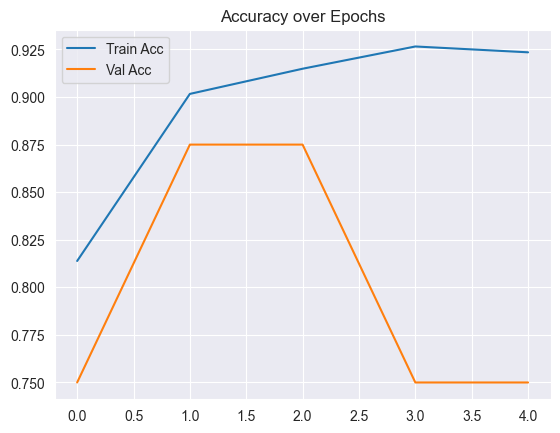

In [22]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

# Optional: Plot training history
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy over Epochs")
plt.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step


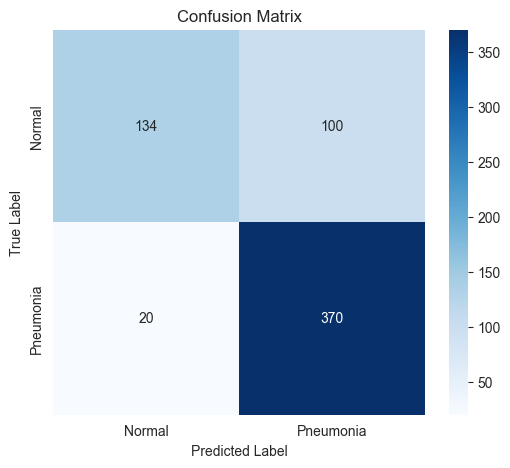

              precision    recall  f1-score   support

      Normal       0.87      0.57      0.69       234
   Pneumonia       0.79      0.95      0.86       390

    accuracy                           0.81       624
   macro avg       0.83      0.76      0.78       624
weighted avg       0.82      0.81      0.80       624



In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get true labels and predicted probabilities
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ['Normal', 'Pneumonia']

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optionally print a classification report
print(classification_report(y_true, y_pred, target_names=labels))